In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import math
from datetime import date, timedelta
plt.style.use('fivethirtyeight')

In [6]:
#load the data
# !pip install yfinance
KODE = 'TLKM.JK'
today_date = date.today()
td = timedelta(365)
mulai = today_date - td

import yfinance as yf
df = yf.download(KODE, start=mulai, end = today_date)
#datam = yf.download(KODE, period="max", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-02-22 00:00:00+07:00 to 2023-02-21 00:00:00+07:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       247 non-null    float64
 1   High       247 non-null    float64
 2   Low        247 non-null    float64
 3   Close      247 non-null    float64
 4   Adj Close  247 non-null    float64
 5   Volume     247 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


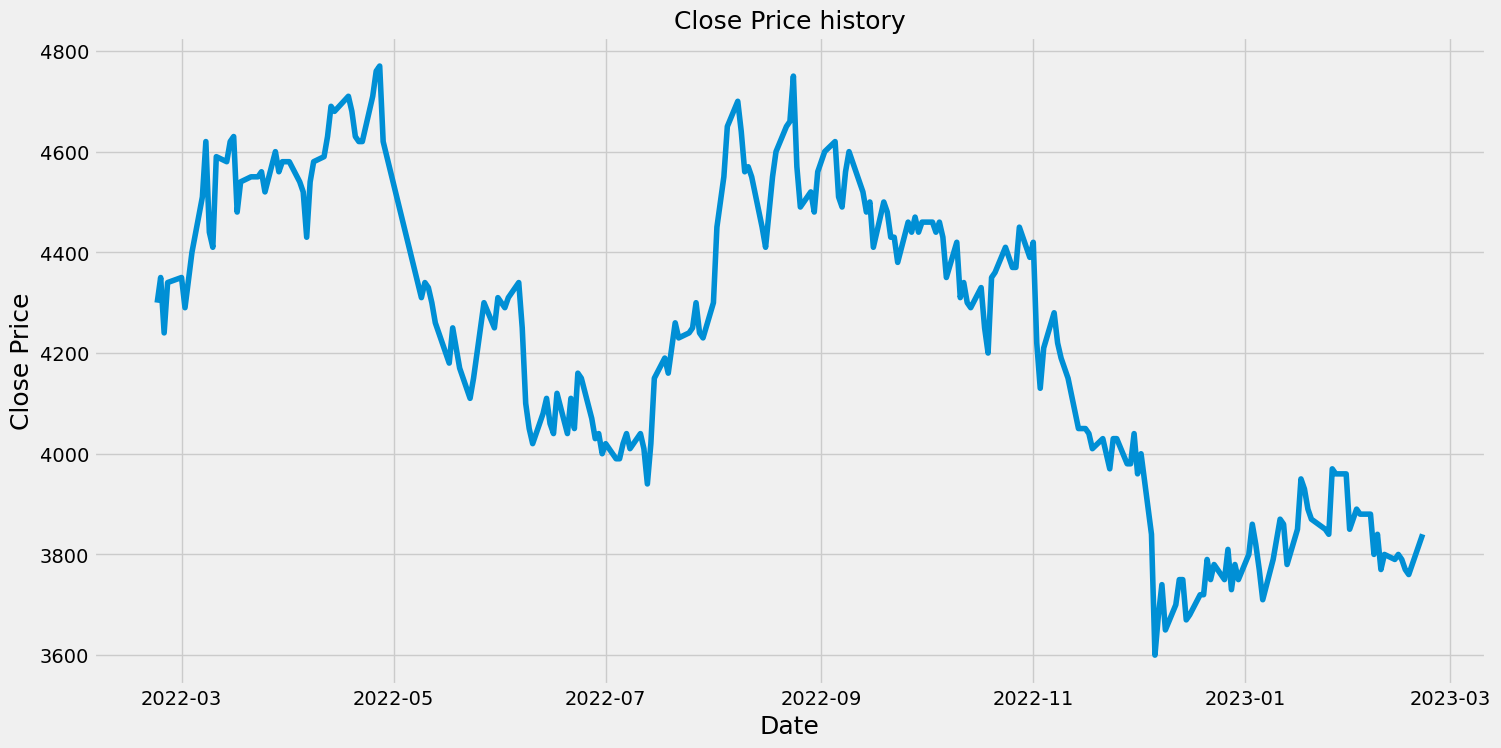

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close Price history',fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [10]:
#create function to calculate Simple moving average (SMA)
def SMA (data,period = 30, column='Close'):
    return data[column].rolling(window=period).mean()

In [11]:
#create two new columns to store 20 day and 50 day SMA
df['SMA20']=SMA(df,20)
df['SMA50']=SMA(df,50)

In [14]:
#get the buy and sell signal
df['Signal'] = np.where(df['SMA20']>df['SMA50'],1,0)
df['Position'] = df['Signal'].diff()

df['Buy']= np.where(df['Position'] == 1,df['Close'],np.NAN)
df['Sell']= np.where(df['Position'] == -1,df['Close'],np.NAN)



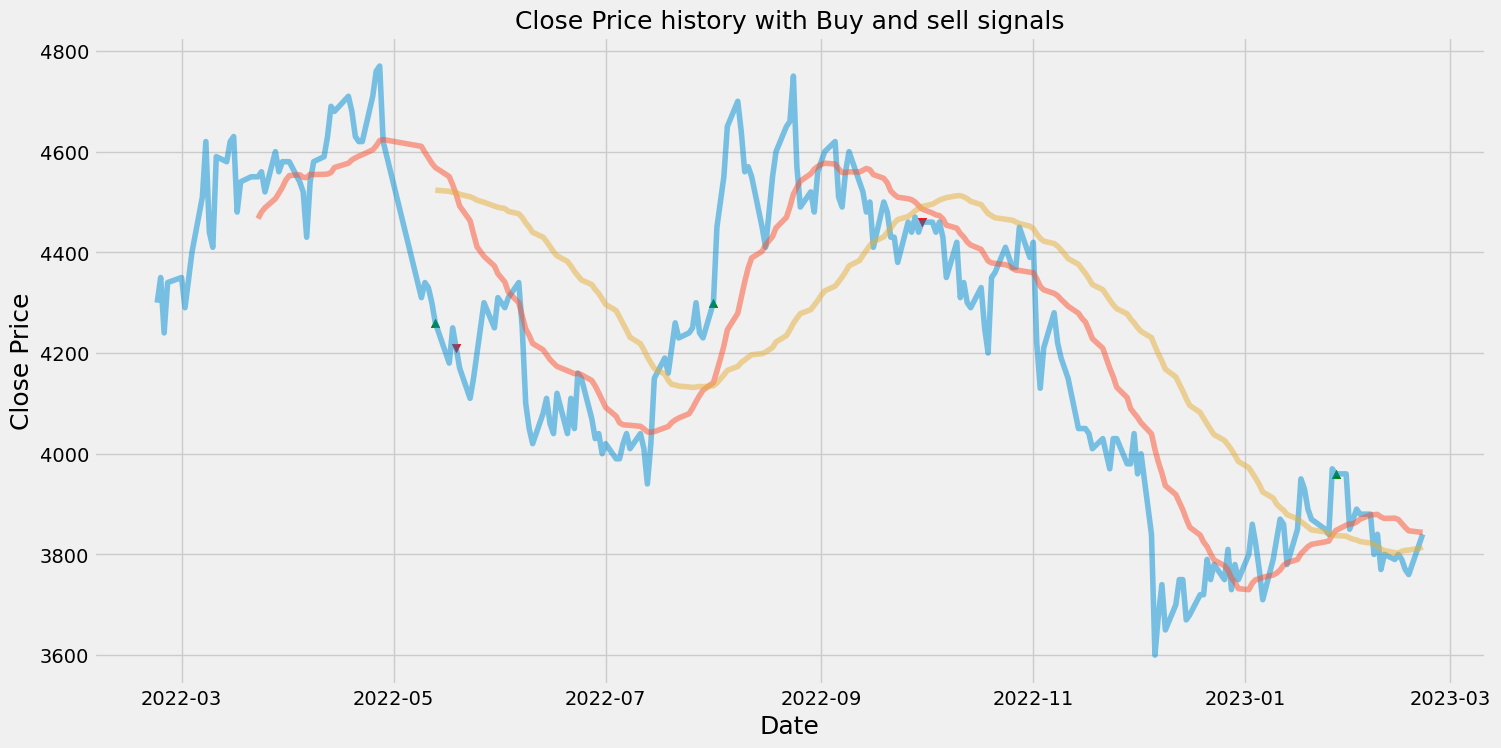

In [17]:
#visually show the close price with the SMA and buy&sell signal

plt.figure(figsize=(16,8))
plt.title('Close Price history with Buy and sell signals',fontsize=18)
plt.plot(df['Close'],alpha = 0.5,label='close')
plt.plot(df['SMA20'],alpha = 0.5,label='SMA20')
plt.plot(df['SMA50'],alpha = 0.5,label='SMA50')
plt.scatter(df.index,df['Buy'],alpha =1,label = 'Buy Signal',marker ='^',color = 'green')
plt.scatter(df.index,df['Sell'],alpha =1,label = 'Sell Signal',marker ='v',color = 'red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()
